<a href="https://colab.research.google.com/github/lightknight64bit/Intro-to-Embedded-AI/blob/main/Intro_to_Embedded_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to ML on devices
## Lecture goals
 * Intro to TinyML, CV, DL and IoT
 * Keras and Tensorflow
 * ANNs, CNNs and R-CNN
 * Object detection in an image
 * Deploying on a device
<div>
<img src="https://www.eetimes.com/wp-content/uploads/media-1310359-tinymllogo-min.png?fit=800%2C737" width="200"/>
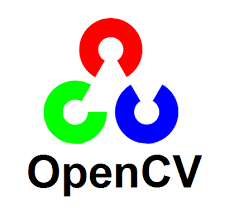
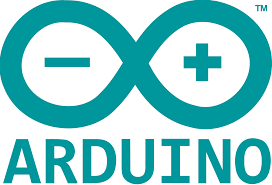
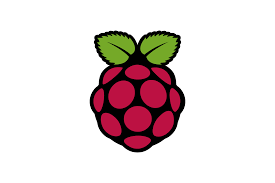
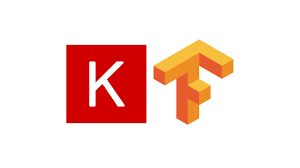
</div>

# What is AI?
Artificial intelligence is the simulation of human intelligence processes by machines, especially computer systems.
# What is Machine Learning?
Machine learning is a method of data analysis that automates analytical model building. It is a branch of artificial intelligence based on the idea that systems can learn from data, identify patterns and make decisions with minimal human intervention.
# What is Deep learning?
Type of machine learning that automates analytical model building by imitating humans. It's called deep due to the number of additional layers used to learn data.
<div>
<img src="https://miro.medium.com/max/970/0*5NrDYk8PryKASFJD">
</div>

# What is IoT?
The Internet of Things (IoT) describes the network of physical objects—“things”—that are embedded with sensors, software, and other technologies for the purpose of connecting and exchanging data with other devices and systems over the internet.
# Why AI for devices
80% of the data collected for ML is collected using IoT devices and architectures. Most of the time, the data is analyzed somewhere else (mostly cloud) and then specific instructions pertaining to the data is sent back to the device. Mostly this step can be eliminated due to increasing capability of devices with advent of technology.

# Intro to DL 

Type of Machine Learning that attempts to learn data the way that humans do.

How do humans learn data?
 * Your brain has millions of special type of cells called neurons.
 * Each and every neuron in your brain is trained to deal with data(nerve signals).
 * Neurons get electrical signals from organs(eyes, ears, touch etc.) and analyze them. There are a set of neurons that analyze eyes, set of neurons that analyze ears and so on.<br>
 <b>Consider this dog</b>
<div>
<img src = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg?crop=1.00xw:0.669xh;0,0.190xh&resize=1200:*">
</div>
 1. Your eyes convert light into electricity for analyzing.
 2. A set of neurons analyze colours, a set of neurons analyze shapes and edges.
 3. You see that one shape is distinct(That of the dog). 
 4. First time you see a dog, you don't know it's a dog unless someone tells you or you learn on your own.
 5. Next time your brain sees a similiar pattern, it knows it's a dog.
 6. Based on the edges, colours etc., you can identify the breed and background details.
 7. The more the brain cells or neurons, the more you can analyze and the more smarter you are. Humans have the second highest number of neurons in the world next only to dolphins.

## How do we replicate this in computers
Since we are analyzing electronic signals anyways, we can recreate the entire thing using computers. 

The main problem is to convert data into electronic signals or something that can be represented virtually, thankfully camera and microphones have been invented so we can do it with no problem at all.

Since conversion of data into electrical signals is no longer a problem, the next problem is learning(i.e telling the computer we are looking at a dog). Computers can't understand words but what they can understand in detail are numbers. Hence we assign numbers. 

Since we are now dealing with numbers, mathematics comes into the picture. If the computer say incorrectly classifies a picture, we also have to deal with some sort of metric to guide the computer. The main mathematics concepts involved are statistics, probability, linear algebra and calculus. 

Thankfully most of the formulas and steps are repeated here for any sort of application so we can build this stuff using libraries that already contain prewritten steps and algorithms(Keras, Tensorflow and pytorch).

Now let's discuss how to recreate
<div>
<img src="https://www.researchgate.net/profile/Zafeirios-Fountas/publication/266485234/figure/fig2/AS:651919710224385@1532441179639/The-simplest-mathematical-model-of-a-neuron-called-the-Perceptron-30.png" >
<img src="https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png" >

Example of a Dense Neural Network

Now let's see how images are built and then let's write some code.

<div>
<img src="https://www.researchgate.net/profile/M-S-Minu-Sanjudharan/publication/333202093/figure/fig1/AS:760280803975169@1558276477576/A-grayscale-image-as-matrix-of-numbers-111-Convolution-Operator-The-reason-for.jpg">
<img src="https://www.researchgate.net/profile/Jane-Courtney/publication/267210444/figure/fig6/AS:295732335661069@1447519491773/A-three-dimensional-RGB-matrix-Each-layer-of-the-matrix-is-a-two-dimensional-matrix.png">
</div>





In [ ]:
import cv2 as cv
import numpy as np
gray = cv.imread('/content/bird.jpeg', cv.IMREAD_GRAYSCALE)
col = cv.imread('/content/bird_gray.jpeg')

## Making a computer recognize handwritten digits with keras and tensorflow.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense ,Activation, Conv2D, MaxPool2D

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


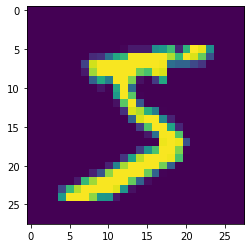

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.imshow(x_train[0])

In [ ]:
y_train[0]

5

In [ ]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential(
    [Flatten(input_shape=(28,28, 1)),
    Dense(128, activation='relu'),
    Dense(256,activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 167,690
Trainable params: 167,690
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=128, epochs=15)

Epoch 1/15
469/469 [==============================] - 5s 4ms/step - loss: 0.2949 - accuracy: 0.9135
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1124 - accuracy: 0.9660
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0761 - accuracy: 0.9762
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0565 - accuracy: 0.9824
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0430 - accuracy: 0.9862
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0374 - accuracy: 0.9878
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0305 - accuracy: 0.9898
Epoch 8/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0250 - accuracy: 0.9916
Epoch 9/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0225 - accuracy: 0.9926
Epoch 10/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0211 - accuracy: 0.9933

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08588366955518723
Test accuracy: 0.9793000221252441


In [ ]:
pred=model.predict(x_train[0].reshape(1, 28,28,1))
np.argmax(pred)

5

# Convolutions,Pooling and how do they work
## Convolutions
![SegmentLocal](https://miro.medium.com/max/625/1*GcI7G-JLAQiEoCON7xFbhg.gif "segment")
![Strides](https://miro.medium.com/max/1400/0*TsOwf6kzkUV8LZBX)
![Convolution formula](https://qph.fs.quoracdn.net/main-qimg-777ad7934005c9809e7cfe18c939cdc2)
## Pooling
![Pooling](https://miro.medium.com/max/625/1*KQIEqhxzICU7thjaQBfPBQ.png)


In [ ]:
from math import floor
stride=3
kernel = np.array([[0,-1,0], [-1,4,-1], [0,-1,0]])
res_width = floor((gray.shape[0]-3)/stride) + 1
res_height = floor((gray.shape[1]-3)/stride) + 1
result = np.zeros((res_width,res_height))
for i in range(res_width):
  for j in range(res_height):
    sum = 0
    for m in np.arange(3):
      for n in np.arange(3):
        sum += gray[(stride * i) + m, (stride * j) + n] * kernel[m, n]
    result[i,j] = sum



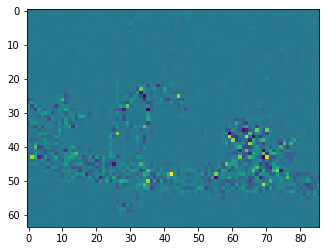

In [ ]:
plt.imshow(result)

# A typical convolutional neural network
![CNN](https://miro.medium.com/max/2000/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

In [ ]:
modelCNN = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1),strides=1),
    MaxPool2D((2,2),strides=1),
    Conv2D(16, (3,3), activation="relu", input_shape=(28,28,1), strides=1),
    MaxPool2D((2,2), strides=1),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
]
)
modelCNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7744)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [ ]:
modelCNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
modelCNN.fit(x_train, y_train, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 33s 12ms/step - loss: 0.1462 - accuracy: 0.9561
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0454 - accuracy: 0.9860
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0309 - accuracy: 0.9901
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0226 - accuracy: 0.9928
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0143 - accuracy: 0.9956


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08588366955518723
Test accuracy: 0.9793000221252441


# Object Detection
![cat, dog](https://drive.google.com/uc?export=view&id=1Bi-yw8BXGj_RwJnGyMaQc1CBHS_g1Rb2)
[Object Detection](https://drive.google.com/file/d/192VH3vb3drpLhEE8vRqo2esp81KOARaP/view?usp=sharing)
[R-CNN](https://arxiv.org/pdf/1311.2524.pdf)
[SSD](https://arxiv.org/pdf/1512.02325.pdf)<br><br>
<img src = https://lh3.googleusercontent.com/proxy/BGgEEMiAdZs_5RTPyND9rID6bedMMZ2CcNnDOmxnRUZRmjL8bObfMAyNJ1kvMXGdvcaRmLaInY3VKSBlzqU24xlf1FLkheYhtx7te4MiI2Fxerse6_jA87oBFyJirV7nAE5Zaxs height=500>

